# Exercises to be solved in class:


## How fast do we need to push cart so box does not fall? (13 min)
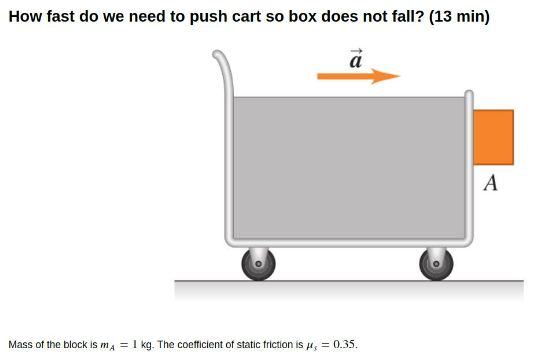

Mass of the block is $m_A = 1 $ kg. The coefficient of static friction is $\mu_s = 0.35$.



## Two heavy blocks of ice on an incline (13 min)

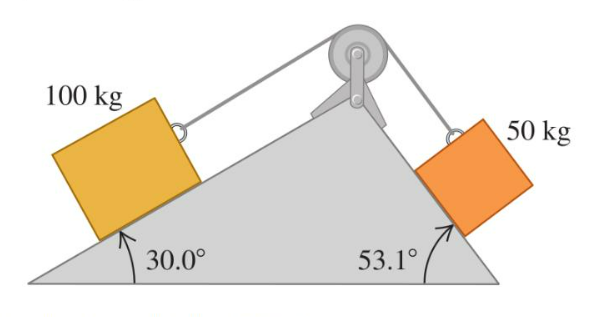

Take the image from homework 1, but let the two boxes correspond to two blocks of ice (neglect friction between the blocks and the incline). There is no static equilibrium now, the blocks will start to accelerate. In what direction? With what magnitude?



## Related to the conical pendulum problem from Gewirtz (14 min)
Take a conical pendulum as in the image of homework 2 (and Gewirtz Fig. 5.5 on p. 73), but with the length of the string and the angle $\alpha$ unspecified. The ball has the mass is $1\rm\,kg$, and we want the radius to be $r=50\rm\,cm$, and the period time to be $T=1\rm\,s$. How many Newtons should the resultant force on the ball be? What does that tell us, how large should the angle $\alpha$ be? Finally, how long should the string be in that case?

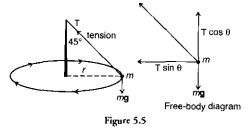



## Summary of class: How Newton's 2nd law prescribes motion (5 min)
1D version of how the equation of motion determines the future and past.

# Write a short python code useful for homework 3.

We use the example of a coin sliding on an incline with friction. We explore the problem in several steps, incrementally.


## First we determine the motion analytically
A coin is sliding off an inclined plane, angle of inclination 30 degrees, from a height of $h=50\rm\,cm$. The coefficient of friction is $\mu = 0.4$. Plot the displacement as a function of time. Do the plot twice: first, using the analytical solution, then, by tracking the motion using Newton's second law, dividing the time up into small intervals of $dt$. If $dt$ is small enough, this should be OK.

half-analytic travel time: 1.152
true analytic travel time: 1.1521240762639222


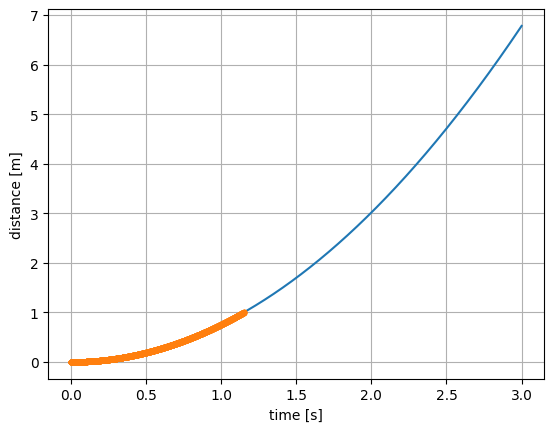

In [6]:
import matplotlib.pylab as plt
import numpy as np
g=9.81
theta=30*np.pi/180  # or equivalently, np.deg2rad(deg_angle)
mu=0.4


t=np.linspace(0,3,10001)
at=g*(np.sin(theta)-mu*np.cos(theta))

# we can check here whether `at` is positive, i.e. the coin starts to slide at all
if at<=0:
    print(F"WARNING! For mu={mu} and theta={theta/np.pi*180} deg, acceleration is {at} m/s^2, and the coin does not start to slide by itself!")

s=at/2*t*t

plt.plot(t,s,"-")   # unfiltered output: body slides "beyond the end of the slope"

# we filter the t[] and s[] array until the s[] values are <=1 (i.e. we are still on the slope)
# length of the slope:
s_tot=0.5/np.sin(theta)
plt.plot(t[s<=s_tot],s[s<=s_tot],".-")

plt.grid(True)
plt.xlabel("time [s]")
plt.ylabel("distance [m]")
#plt.ylim([0,1])
print(F"half-analytic travel time: {t[s<=s_tot][-1]}")
print(F"true analytic travel time: {(2*s_tot/at)**.5}")

We can read off the time needed for the coin to reach the bottom: roughly 1.2 seconds.
We can also calculate this:

$$ t = \sqrt{2s/a} = \sqrt{\frac{2h/\sin\theta}{g [\sin(\theta) - \mu \cos(\theta)]}} $$

## Euler's method: we calculate the motion by stepping the time

What we are doing is called "integrating the equations of motion" using Euler's method.

The main idea: from time $t$ to $t+dt$, the object
1. moves because it has a velocity (need to update its position)
2. accelerates because it has an acceleration (need to update its velocity)
3. experiences maybe a new values of the forces (new position, new velocity)
4. the sum of forces determines its acceleration (need to update acceleration)

### Outline of the algorithm:

1) Preparation: Initialize two empty list to collect the t and s values. You will use these lists to plot: `plot(t, s)`. Set the values of h, theta, mu, g.

2) Initial conditions: t, x, v, a should all be 0.

3) *Loop* while the coin is still on the incline:
* 0)    t = t + dt
* 1)    x = x + v dt
* 2)    a = sum of F / m
* 3)    v = v + a dt
* 4)    append the t and x values to the lists t and s

4) Do the plot


Total time: 1.155 seconds
Total time in theory: 1.1521 seconds


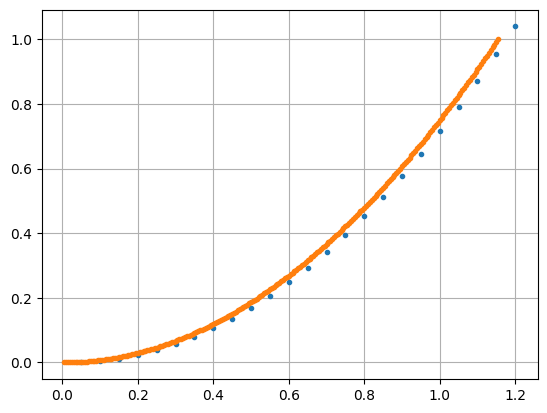

In [9]:
#@title Instructor + Students together

# coin slipping on an inclined plane
h = 0.5
theta = 30/180*np.pi
mu = 0.4
g = 9.81
s_tot = h/np.sin(theta)
m = 0.005 # 5 grams

# Choose the timestep dt as reasonably small (will check if small enough)
dt = 0.05

#initial conditions:
s = 0
v = 0
# a = 0 # this will be calculated based on s, v and t.
t = 0
# python also allows you to write it in a more condensed way:
s, v, a, t = 0, 0, 0, 0

ss, tt = [], []

while s<s_tot:
    t_new = t + dt
    s_new = s + dt*v

    # Calculate the sum of forces, use it
    #  for the new acceleration:
    a = (m*g*np.sin(theta)-mu*m*g*np.cos(theta)) / m
    # now force does not depend on t, s or v. But if so, use t, s, v and NOT t_new, s_new, v_new!!

    v_new = v + dt*a

    t, s, v = t_new, s_new, v_new
    ss.append(s)
    tt.append(t)

plt.plot(tt, ss, ".")
plt.grid()

# Choose the timestep dt as reasonably small (will check if small enough)
dt = 0.005

#initial conditions:
s = 0
v = 0
# a = 0 # this will be calculated based on s, v and t.
t = 0
# python also allows you to write it in a more condensed way:
s, v, a, t = 0, 0, 0, 0

ss, tt = [], []

while s<s_tot:
    t_new = t + dt
    s_new = s + dt*v

    # Calculate the sum of forces, use it
    #  for the new acceleration:
    a = g*(np.sin(theta)-mu*np.cos(theta))
    # Now force and therefore a does not depend on t, s or v.
    # But if so, use t, s, v and NOT t_new, s_new, v_new!!

    v_new = v + dt*a

    t, s, v = t_new, s_new, v_new
    ss.append(s)
    tt.append(t)

plt.plot(tt, ss, ".")

print("Total time: %.5g seconds"%tt[-1])
print("Total time in theory: %.5g seconds"%(np.sqrt(2*h/np.sin(theta)
                    / (g * (np.sin(theta) - mu*np.cos(theta))))))

# 4) What we have looks good, but is a little off.

We should try to use smaller timesteps. But how much smaller?

We create an outer loop with several $\Delta t=$ `dt` values, then it is easy to compare them.

Does the result converge as $\Delta t\rightarrow 0$?

Total time in theory: 1.1521 seconds
Total time, dt=0.1:  1.4 seconds
Total time, dt=0.01:  1.17 seconds
Total time, dt=0.001:  1.154 seconds
Total time, dt=0.0001:  1.1523 seconds


Text(0, 0.5, 'distance [m]')

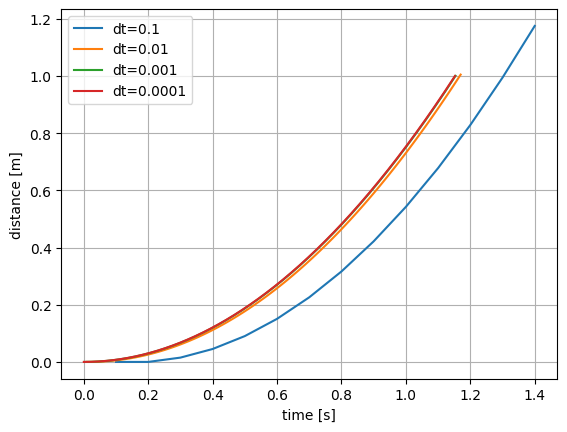

In [11]:
#@title Let us study the dt-dependence

dt_vals = [0.1, 0.01, 0.001, 0.0001]
h = 0.5
theta = 30/180*np.pi
mu = 0.4
g = 9.81
s_tot = h/np.sin(theta)
m = 0.005
print("Total time in theory: %.5g seconds"%(np.sqrt(2*h/np.sin(theta)
                    / (g * (np.sin(theta) - mu*np.cos(theta))))))

# Choose the timestep dt as reasonably small (will check if small enough)

for dt in dt_vals:
    s, v, a, t = 0, 0, 0, 0
    ss, tt = [], []

    while s<s_tot:
        t_new = t + dt
        s_new = s + dt*v
        v_new = v + dt*a
        a = g*(np.sin(theta)-mu*np.cos(theta))
        t, s, v = t_new, s_new, v_new
        ss.append(s)
        tt.append(t)

    plt.plot(tt, ss, label="dt=%.2g"%dt)
    print("Total time, dt=%.2g:  %.5g seconds"%(dt, tt[-1]))

plt.legend()
plt.grid()
plt.xlabel("time [s]")
plt.ylabel("distance [m]")

# Homework

### 1) Static equilibrium - how small can $\mu_s$ be?

Consider the image below, which is in equilibrium because of static friction. The coefficient of static friction is the same between all surfaces. What can you say, at least how large is this coefficient? (3p)



### 2) Steel ball on a conical pendulum - what is the period time?

A steel ball of mass 1 kg is swinging on a rope of length 25 cm, drawing circles, as on p73 of the Gewirtz book. How large is the tension in the rope? What is the period time? (3p)

### 3) How high can I shoot with a gun?

I shoot a .30 Luger vertically upwards. How high will its bullet travel? After how much time will the bullet hit the ground? What is its velocity upon impact? Calculate these quantities neglecting air resistance (drag). Now include air resistance in the form of a drag force

$$ \mathbf{F}_\mathrm{drag} = -\rho C_d \frac{A}{2}  v^2 \frac{\mathbf{v}}{v} $$

You can no longer solve the problem on a piece of paper, but you can calculate the answers to the 3 questions above using the numerical solution of the problem. Plot the height-time curve of the bullet, and calculate these quantities. Compare the velocity with which the bullet falls back to the terminal velocity.(4p)

Density of air $\rho = 1.293\,\mathrm{kg/m}^3$.  Drag coefficient of a bullet: $C_d = 0.295$. For the cross-sectional area of a bullet, diameter: $7.82 \,\mathrm{mm}$. Muzzle velocity: $ 1330 \,\mathrm{km/h}$. Mass of bullet: $6.03 \,\mathrm{g}$. Try to calculate everything up to 3 significant digits.

Homework solution

Populating the interactive namespace from numpy and matplotlib
Max height: 1011.6 m
Time until bullet returns: 29.2 s
Velocity of return: 282.9 km/h, terminal velocity should be 289.3 km/h
Max height: 1018.7 m
Time until bullet returns: 29.36 s
Velocity of return: 282.7 km/h, terminal velocity should be 289.3 km/h
Max height: 1019.4 m
Time until bullet returns: 29.381 s
Velocity of return: 282.69 km/h, terminal velocity should be 289.3 km/h


/usr/local/lib/python3.10/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


Max height: 1019.4 m
Time until bullet returns: 29.382 s
Velocity of return: 282.69 km/h, terminal velocity should be 289.3 km/h


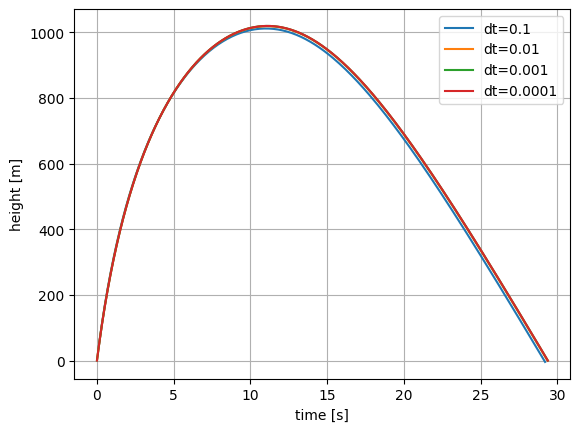

theory:  1019.4317544369493


In [12]:
%pylab inline
g = 9.81
rho = 1.293
C_d = 0.295
r = 7.82e-3 / 2
m = 6.03e-3
v0 = 1330/3.6

A = r*r*pi
drag_coefficient = rho*C_d*A/2

dt_vals = (0.1, 0.01, 0.001, 0.0001)
for dt in dt_vals:
    y, a, t = 0, 0, 0
    v = v0
    yy, tt = [], []
    while y >= 0:
        t += dt
        y += dt*v
        a = (-m*g - drag_coefficient*v*v * sign(v)) / m
        v += dt*a
        yy.append(y)
        tt.append(t)

    plot(tt, yy, label="dt=%.5g"%dt)

    print("Max height: %.5g m"%max(yy))
    print("Time until bullet returns: %.5g s"%t)
    print("Velocity of return: %.5g km/h, terminal velocity should be %.5g km/h"
          %(abs(v)*3.6, sqrt(m*g/drag_coefficient)*3.6))
grid()
legend()
xlabel("time [s]")
ylabel("height [m]")
show()

print("theory: ", m/(2*drag_coefficient)*log(1+drag_coefficient*v0*v0/(m*g)))

Without air resistance:
Max height: 6956.636 m
Time to hit the ground: 75.320 s
Velocity upon impact: -369.444 m/s

With air resistance:
Max height: 1019.424 m
Time to hit the ground: 29.382 s
Velocity upon impact: -78.525 m/s


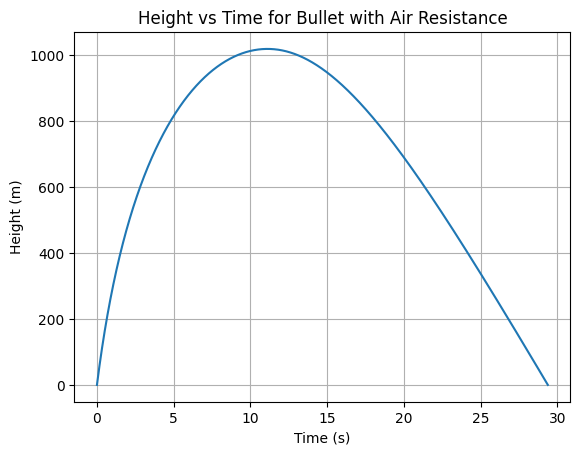


Terminal Velocity: 80.361 m/s


In [15]:
# Solution of the probelm by Google Gemini

# Constants
g = 9.81  # Acceleration due to gravity (m/s^2)
rho = 1.293  # Density of air (kg/m^3)
Cd = 0.295  # Drag coefficient
r = 7.82e-3 / 2  # Bullet radius (m)
m = 6.03e-3  # Bullet mass (kg)
v0 = 1330 / 3.6  # Initial velocity (m/s)
A = r * r * np.pi  # Cross-sectional area (m^2)
drag_coefficient = rho * Cd * A / 2  # Drag coefficient

# Neglecting air resistance
# Max height
max_height_no_drag = v0**2 / (2 * g)

# Time to hit the ground
time_to_hit_ground_no_drag = 2 * v0 / g

# Velocity upon impact
velocity_upon_impact_no_drag = -v0


# Including air resistance
dt = 0.0001
y, a, t = 0, 0, 0
v = v0
yy, tt = [], []

while y >= 0:
  t += dt
  y += dt * v
  a = (-m * g - drag_coefficient * v * v * np.sign(v)) / m
  v += dt * a
  yy.append(y)
  tt.append(t)

max_height_with_drag = max(yy)
time_to_hit_ground_with_drag = t
velocity_upon_impact_with_drag = v


print("Without air resistance:")
print("Max height: {:.3f} m".format(max_height_no_drag))
print("Time to hit the ground: {:.3f} s".format(time_to_hit_ground_no_drag))
print("Velocity upon impact: {:.3f} m/s".format(velocity_upon_impact_no_drag))

print("\nWith air resistance:")
print("Max height: {:.3f} m".format(max_height_with_drag))
print("Time to hit the ground: {:.3f} s".format(time_to_hit_ground_with_drag))
print("Velocity upon impact: {:.3f} m/s".format(velocity_upon_impact_with_drag))

# Plot the height-time curve
plt.plot(tt, yy)
plt.xlabel("Time (s)")
plt.ylabel("Height (m)")
plt.title("Height vs Time for Bullet with Air Resistance")
plt.grid(True)
plt.show()

# Terminal velocity
terminal_velocity = np.sqrt(m * g / drag_coefficient)
print("\nTerminal Velocity: {:.3f} m/s".format(terminal_velocity))
